In [49]:
import os
import wave
import struct
import pandas as pd
import scipy
from scipy import signal
from scipy.fft import fftshift

import numpy as np
np.random.seed(seed=42)
import seaborn as sns

import matplotlib.pyplot as plt 
import matplotlib.pylab as plab
from matplotlib import colors as c

import IPython.display as ipd
import librosa
import librosa.display

# Funções auxiliares

In [52]:
def plot_wave(caminho, titulo):    
    data, sample_rate = librosa.load(caminho)
    print("Frequência do áudio: ", sample_rate)
    librosa.display.waveplot(data,sr=sample_rate)
    plt.title(titulo)
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude")   
    
def plot_fft_wave(caminho, titulo, x_limits):
    data, sample_rate = librosa.load(caminho)
    n = len(data)
    T = 1/sample_rate
    yf = scipy.fft.fft(data) #Aplica a FFT no audio
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf
    
    fig, ax = plt.subplots()
    
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    ax.set_xlim(x_limits)
    plt.grid()
    plt.xlabel("Frequência")
    plt.ylabel("Magnitude")
    plt.title(titulo)
    
def plot_wave_with_fft(caminho):  
    data, sample_rate = librosa.load(caminho)
    n = len(data)
    T = 1/sample_rate
    yf = scipy.fft.fft(data) #Aplica a FFT no audio
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    librosa.display.waveplot(data,sr=sample_rate)
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude")
    plt.title("Onda")
    ax = plt.gca()
#     ax.set_xlim([0, 50])
    ax.set_ylim([-0.2, 0.2])
    
    plt.subplot(1, 2, 2)
    plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlim(0, 2000)
    plt.xlabel("Frequência")
    plt.ylabel("Magnitude")
    plt.title("FFT")
    # Set limits
    ax = plt.gca()
    ax.set_xlim([0, 50])
#     ax.set_ylim([ymin, ymax])
    
def plot_multiple_FFT(lista_caminhos, xlim=[0,50]):
    plt.figure(figsize=(15, 10))
    plt.grid()
    plt.xlabel("Frequência")
    plt.xlim(xlim)
    plt.ylabel("Magnitude")    
    
    for caminho in lista_caminhos:
        data, sample_rate = librosa.load(caminho)
        n = len(data)
        T = 1/sample_rate
        yf = scipy.fft.fft(data) #Aplica a FFT no audio
        xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf

        plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    
    plt.legend(lista_caminhos)
    
        
def spectrograma(caminho):
    x, fs = librosa.load(caminho)
    f, t, Sxx = signal.spectrogram(x, fs)
    cMap = c.ListedColormap(['w','b'])
    plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap=cMap)
    plt.ylabel('Frequência [Hz]')
    plt.xlabel('Tempo [sec]')

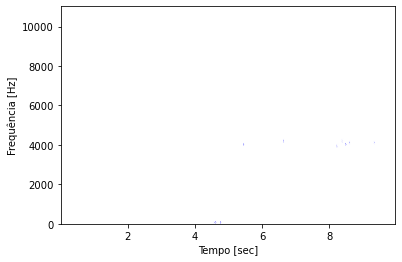

In [53]:
spectrograma(desbalanceado)

# Analise do cenário em som ambiente

In [17]:
base_path = '../Obtenção de dados/Saídas/'
base_path

'../Obtenção de dados/Saídas/'

# Carregar os dados

In [18]:
tests_path = ['0 - Regime Normal/', 
              '1 - Falta de tensão/', 
              '2 - Sobrecarga/', 
              '3 - Desbalanceamento do eixo/']

tests_path

['0 - Regime Normal/',
 '1 - Falta de tensão/',
 '2 - Sobrecarga/',
 '3 - Desbalanceamento do eixo/']

In [19]:
os.listdir(base_path)

['0 - Regime Normal',
 '1 - Falta de tensão',
 '2 - Sobrecarga',
 '3 - Desbalanceamento do eixo']

### Encontrar o caminho completo de todos os arquivos

In [7]:
all_files = []

for f in tests_path:    
    all_files = all_files + [(base_path + f + i, f) for i in os.listdir(base_path + f)]

all_files

[('../Obtenção de dados/Saídas/0 - Regime Normal/2021-05-26 20_52_05.056246.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/0 - Regime Normal/2021-05-26 20_52_19.030997.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/0 - Regime Normal/2021-05-26 20_52_48.734353.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/0 - Regime Normal/2021-05-26 20_53_01.114803.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/0 - Regime Normal/2021-05-26 20_53_12.448972.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/0 - Regime Normal/2021-05-26 20_53_24.358845.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/0 - Regime Normal/2021-05-26 20_53_43.925687.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/0 - Regime Normal/2021-05-26 20_54_01.121870.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/0 - Regime Normal/2021-05-26 20_54_13.613173.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/0 - Re

## Carregar os arquivos e adiciona-los em um conjunto manipulável

#### Exemplo para um arquivo

In [8]:
import wave
import struct

CHUNK = 1024 * 2

# some_file = '../Obtenção de dados/Saídas/0 - Regime Normal/2021-05-26 20:53:43.925687.wav'
some_file = all_files[0][0]

wave_file = wave.open(some_file, 'rb')
data = wave_file.readframes(CHUNK)
dataInt = struct.unpack(str(CHUNK) + 'h', data)

#### Carregar todos

In [9]:
df_audio = pd.DataFrame()

for f, c in all_files:
    df_aux = pd.DataFrame()
    
    wave_file = wave.open(f, 'rb')
    data = wave_file.readframes(CHUNK)
    dataInt = struct.unpack(str(CHUNK) + 'h', data)
    
    df_aux = df_aux.append(pd.Series(dataInt), ignore_index=True)
    df_aux['class'] = c
    df_audio = pd.concat([df_audio, df_aux])
    
    
    
df_audio = df_audio.reset_index(drop=True)
df_audio.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,class
0,1262.0,1180.0,1160.0,1200.0,1273.0,1372.0,1399.0,1465.0,1578.0,1595.0,...,-5.0,68.0,124.0,152.0,146.0,90.0,2.0,-131.0,-182.0,0 - Regime Normal/
1,-3654.0,-3577.0,-3553.0,-3519.0,-3389.0,-3346.0,-3378.0,-3438.0,-3496.0,-3498.0,...,-85.0,-91.0,-203.0,-305.0,-355.0,-335.0,-331.0,-322.0,-294.0,0 - Regime Normal/
2,-551.0,-399.0,-394.0,-418.0,-445.0,-379.0,-283.0,-310.0,-253.0,-125.0,...,2240.0,2329.0,2438.0,2558.0,2550.0,2380.0,2297.0,2343.0,2320.0,0 - Regime Normal/
3,1775.0,1653.0,1672.0,1650.0,1670.0,1720.0,1767.0,1847.0,1947.0,2004.0,...,3742.0,3800.0,3850.0,4008.0,4176.0,4197.0,4116.0,4012.0,3931.0,0 - Regime Normal/
4,2305.0,2196.0,2092.0,2028.0,1909.0,1807.0,1776.0,1839.0,1902.0,1943.0,...,-1234.0,-1330.0,-1386.0,-1403.0,-1380.0,-1344.0,-1329.0,-1344.0,-1366.0,0 - Regime Normal/


## Salvar os dados em um conjunto intermediário

In [10]:
df_audio.to_csv('Saídas/dados_carregados.csv')

### Verificar a quantidade de amostras por classe

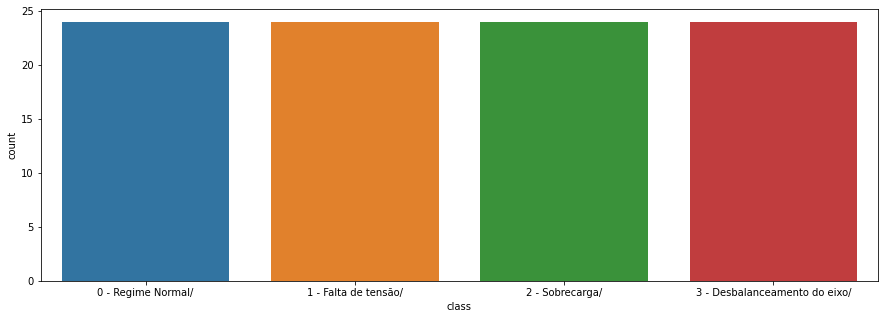

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_audio, x = 'class');

# Análise das formas de onda no dominio da transformada

In [12]:
regime_normal = all_files[0][0]
falta_tensao = all_files[28][0]
sobrecarga = all_files[56][0]
desbalanceado = all_files[84][0]

### Regime normal

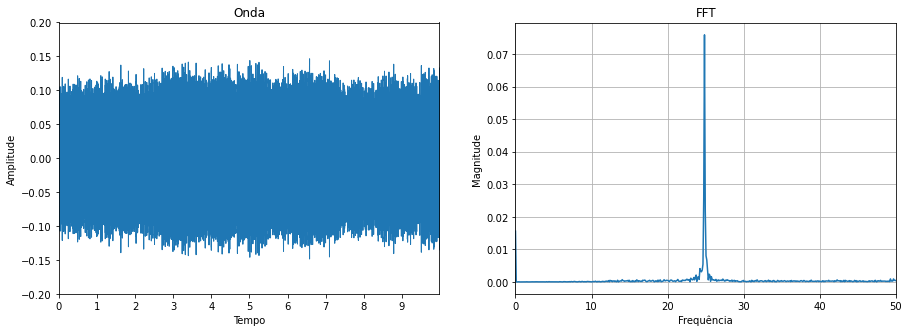

In [37]:
plot_wave_with_fft(regime_normal)

### Falta de tensão

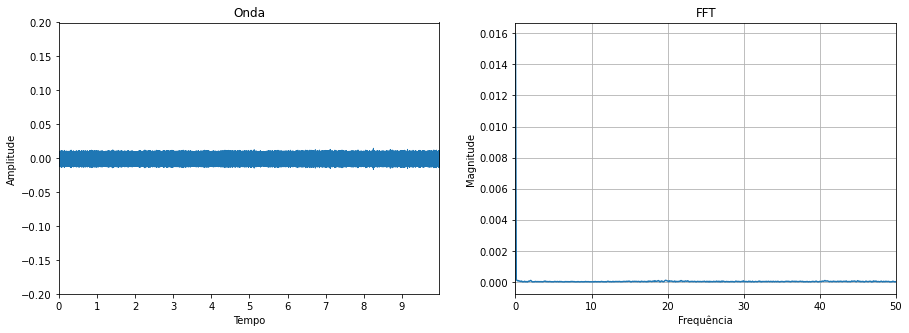

In [38]:
plot_wave_with_fft(falta_tensao)

### Sobrecarga

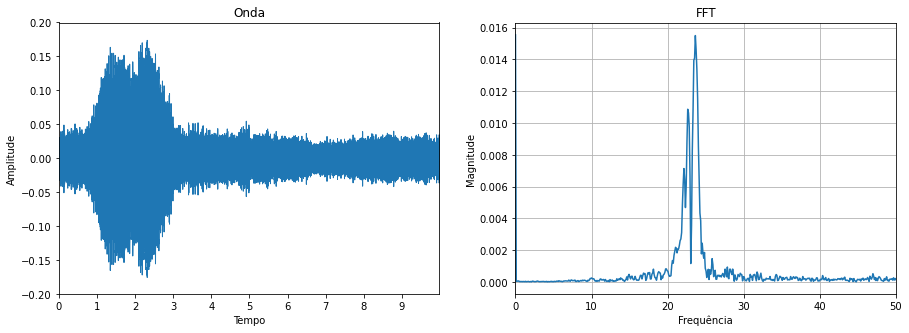

In [39]:
plot_wave_with_fft(sobrecarga)

### Desbalanceamento

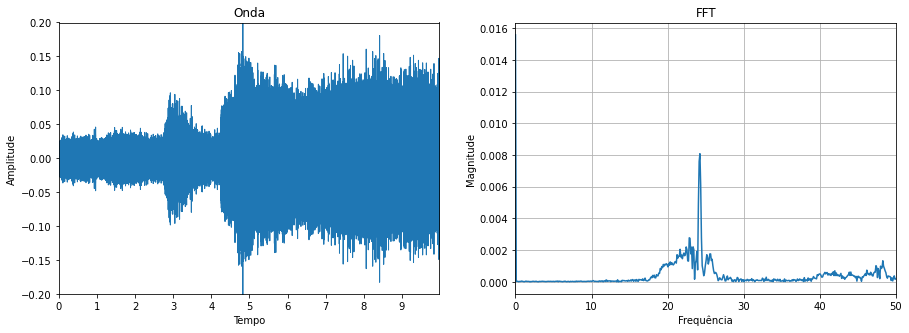

In [40]:
plot_wave_with_fft(desbalanceado)

### Notas observadas

* Pouca variação no espectro
* A aplicacao de um filtro passa alta pode ser interessante visto que a sobrecarga e o regime normal em baixas frequencias sao muito semelhantes

### Considerações no processamento
* Experimentar um modo hibrido de treinamento caso não se tenha um bom desempenho apenas com a FFT\

# Resumo das faixas de frequência

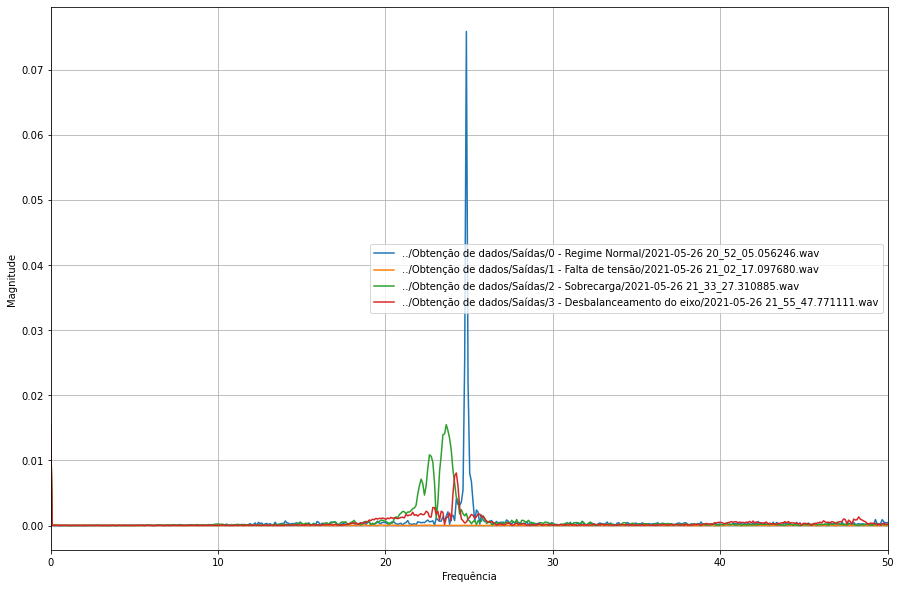

In [32]:
lista_fft = [
    regime_normal,
    falta_tensao,
    sobrecarga,
    desbalanceado
]

plot_multiple_FFT(lista_fft)

### Notas:
* Amplo espectro com baixa variação 

# Análise com Espectograma 

<ipython-input-41-6412bf7ebe41>:77: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, Sxx)


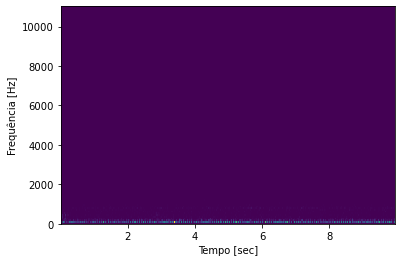

In [42]:
spectrograma(regime_normal)

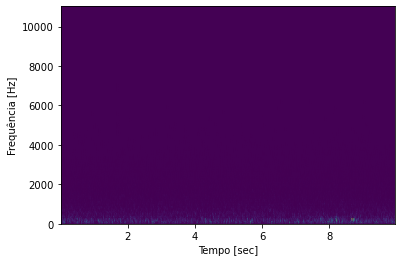

In [18]:
spectrograma(falta_tensao)

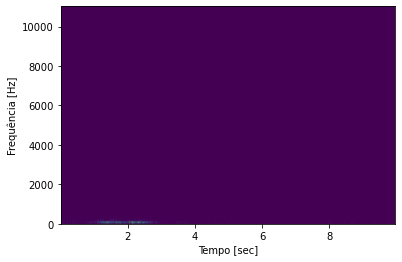

In [19]:
spectrograma(sobrecarga)

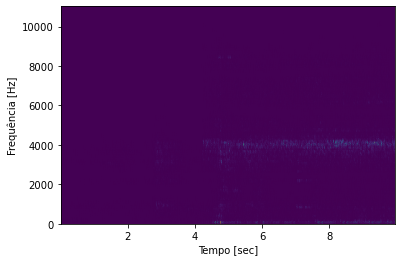

In [20]:
spectrograma(desbalanceado)

### Notas
* A variação da frequência no tempo fica um pouco mais evidente com o uso do espectrograma

# 1º Teste: Conjunto de dados cru sem aplicação da FFT

In [21]:
import pandas as pd

df_audio = pd.read_csv('Saídas/dados_carregados.csv', index_col=0)
df_audio.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,class
0,1262.0,1180.0,1160.0,1200.0,1273.0,1372.0,1399.0,1465.0,1578.0,1595.0,...,-5.0,68.0,124.0,152.0,146.0,90.0,2.0,-131.0,-182.0,0 - Regime Normal/
1,-3654.0,-3577.0,-3553.0,-3519.0,-3389.0,-3346.0,-3378.0,-3438.0,-3496.0,-3498.0,...,-85.0,-91.0,-203.0,-305.0,-355.0,-335.0,-331.0,-322.0,-294.0,0 - Regime Normal/
2,-551.0,-399.0,-394.0,-418.0,-445.0,-379.0,-283.0,-310.0,-253.0,-125.0,...,2240.0,2329.0,2438.0,2558.0,2550.0,2380.0,2297.0,2343.0,2320.0,0 - Regime Normal/
3,1775.0,1653.0,1672.0,1650.0,1670.0,1720.0,1767.0,1847.0,1947.0,2004.0,...,3742.0,3800.0,3850.0,4008.0,4176.0,4197.0,4116.0,4012.0,3931.0,0 - Regime Normal/
4,2305.0,2196.0,2092.0,2028.0,1909.0,1807.0,1776.0,1839.0,1902.0,1943.0,...,-1234.0,-1330.0,-1386.0,-1403.0,-1380.0,-1344.0,-1329.0,-1344.0,-1366.0,0 - Regime Normal/


### Separação de entradas e saídas

In [22]:
X = df_audio.drop(['class'], axis=1)
y = df_audio['class']

### Encode das saidas

In [23]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

y = lbl_enc.fit_transform(y)

## Separação treino e teste 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Experimentação com algoritmos tradicionais 

In [25]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
        
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.400


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.250


NuSVC(gamma='auto', probability=True)
model score: 0.250


DecisionTreeClassifier()
model score: 0.350


RandomForestClassifier()
model score: 0.450


AdaBoostClassifier()
model score: 0.350


GradientBoostingClassifier()
model score: 0.250




## Experimentação com Algoritimo de aprendizagem profunda

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(12, input_dim=2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [30]:
model.fit(X_train_deep, y_train_deep, epochs=100, batch_size=100)

Epoch 1/100
1/1 [==============================] - 19s 19s/step - loss: 135.2406 - accuracy: 0.3026
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: -161.0914 - accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: -420.2585 - accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: -805.8462 - accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: -1343.3464 - accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: -2047.7085 - accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: -2930.1580 - accuracy: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: -3997.0078 - accuracy: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: -5262.4731 - accuracy: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: -6743.5889 - accuracy: 

In [31]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 492ms/step - loss: -8053952.0000 - accuracy: 0.2500
Accuracy: 25.00


### Notas:
* Performance pifia

# Teste do melhor algoritimo com outras métricas

In [32]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)   

KNeighborsClassifier()

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predicoes = clf.predict(X_test)

In [34]:
accuracy_score(y_test, predicoes)

0.45

In [35]:
confusion_matrix(y_test, predicoes)

array([[2, 2, 1, 0],
       [0, 5, 0, 0],
       [0, 4, 0, 1],
       [0, 3, 0, 2]], dtype=int64)

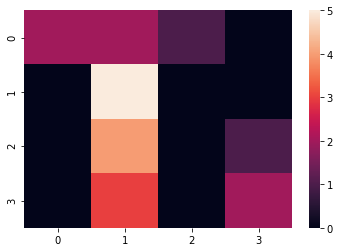

In [36]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [37]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.36      1.00      0.53         5
           2       0.00      0.00      0.00         5
           3       0.67      0.40      0.50         5

    accuracy                           0.45        20
   macro avg       0.51      0.45      0.40        20
weighted avg       0.51      0.45      0.40        20



### Resultados inaceitáveis

# 2º teste: Submissão dos dados a uma FFT 

In [38]:
def apply_fft_in_df(dataInt):
    fft_value = np.fft.fft(dataInt)
    absolute_value = np.abs(fft_value).mean()
    imaginary_value = np.imag(fft_value).mean()
    
    return absolute_value, imaginary_value

X_fft = X.apply(apply_fft_in_df, axis=1, result_type='expand')

In [39]:
X_fft.head()

,0,1
0,11332.257144,-2.273737e-13
1,12496.597213,0.000000e+00
2,12886.051282,0.000000e+00
3,11888.214177,2.273737e-13
4,13832.573825,0.000000e+00


## Separação treino e teste 

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_fft, y, test_size=0.2, random_state=42, stratify=y)

# Treino de algoritmo 

In [41]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.350


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.300


NuSVC(gamma='auto', probability=True)
model score: 0.300


DecisionTreeClassifier()
model score: 0.450


RandomForestClassifier()
model score: 0.450


AdaBoostClassifier()
model score: 0.350


GradientBoostingClassifier()
model score: 0.450




In [42]:
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [43]:
model.fit(X_train_deep, y_train_deep, epochs=100, batch_size=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: -33.6418 - accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: -424.9864 - accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: -810.8924 - accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: -1193.4691 - accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: -1572.6129 - accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: -1949.9781 - accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: -2328.3020 - accuracy: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: -2708.4592 - accuracy: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: -3088.7727 - accuracy: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: -3470.9255 - accuracy: 0

In [44]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 303ms/step - loss: -75352.9453 - accuracy: 0.2500
Accuracy: 25.00


### Notas:
* Performance pifia, DecisionTreeClassifier e Gradient Boosting parecem promissores

# Teste do melhor algoritimo com outras métricas

In [45]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)   

DecisionTreeClassifier()

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predicoes = clf.predict(X_test)

In [47]:
accuracy_score(y_test, predicoes)

0.45

In [48]:
confusion_matrix(y_test, predicoes)

array([[3, 0, 0, 2],
       [1, 2, 1, 1],
       [0, 1, 2, 2],
       [1, 1, 1, 2]], dtype=int64)

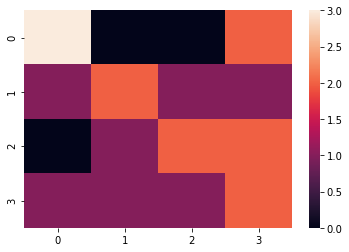

In [49]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [50]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.40      0.44         5
           2       0.50      0.40      0.44         5
           3       0.29      0.40      0.33         5

    accuracy                           0.45        20
   macro avg       0.47      0.45      0.46        20
weighted avg       0.47      0.45      0.46        20



### Resultados melhoraram, mas ainda estao bem ruins. Por exemplo na classe 2 (Sobrecarga)

In [51]:
lbl_enc.classes_

array(['0 - Regime Normal/', '1 - Falta de tensão/', '2 - Sobrecarga/',
       '3 - Desbalanceamento do eixo/'], dtype=object)

# 3º Teste: obter os valores de média, minimo e máximo e a média da parte real e imaginária da FFT 

In [52]:
def transform_array(arr):
    mean = arr.mean()
    minimun = arr.min()
    maximun = arr.max()
    
    fft_value = np.fft.fft(arr)
    real_part = np.abs(fft_value).mean()
    imaginary_part = np.imag(fft_value).mean()
    
    return np.array([mean, minimun, maximun, real_part, imaginary_part])

In [53]:
transform_array(X.iloc[0])

array([ 3.05159180e+02, -3.47600000e+03,  3.14500000e+03,  1.13322571e+04,
       -2.27373675e-13])

In [54]:
X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform.head()

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,305.159180,-3476.0,3145.0,11332.257144,-2.273737e-13
1,19.894043,-3654.0,4321.0,12496.597213,0.000000e+00
2,296.060547,-3701.0,4180.0,12886.051282,0.000000e+00
3,617.674805,-3547.0,4654.0,11888.214177,2.273737e-13
4,313.874023,-3681.0,4748.0,13832.573825,0.000000e+00


In [55]:
X_output = X_transform.copy()
X_output['class'] = y

X_output.to_csv('Saídas/X_transform.csv')

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.450


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.350


NuSVC(gamma='auto', probability=True)
model score: 0.350


DecisionTreeClassifier()
model score: 0.550


RandomForestClassifier()
model score: 0.600


AdaBoostClassifier()
model score: 0.250


GradientBoostingClassifier()
model score: 0.650




In [58]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [59]:
model.fit(X_train_deep, y_train_deep, epochs=100, batch_size=100)

Epoch 1/100
1/1 [==============================] - 1s 905ms/step - loss: -3670.3667 - accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: -3739.5115 - accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: -3808.8906 - accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: -3878.4524 - accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: -3948.1335 - accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: -4018.1394 - accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: -4088.5283 - accuracy: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: -4159.1089 - accuracy: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: -4229.9351 - accuracy: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: -4300.7632 - accu

In [60]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 255ms/step - loss: -6961.8579 - accuracy: 0.2500
Accuracy: 25.00


### Notas
* Melhoria significativa em disversos algoritmos
* Redes Neurais ainda se mostram muito ineficientes

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [62]:
accuracy_score(y_test, predicoes)

0.65

In [63]:
confusion_matrix(y_test, predicoes)

array([[4, 1, 0, 0],
       [1, 3, 1, 0],
       [0, 1, 4, 0],
       [2, 0, 1, 2]], dtype=int64)

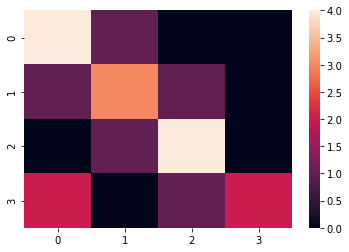

In [64]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [65]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.60      0.60      0.60         5
           2       0.67      0.80      0.73         5
           3       1.00      0.40      0.57         5

    accuracy                           0.65        20
   macro avg       0.71      0.65      0.64        20
weighted avg       0.71      0.65      0.64        20



In [66]:
lbl_enc.inverse_transform([0,1,2,3])

array(['0 - Regime Normal/', '1 - Falta de tensão/', '2 - Sobrecarga/',
       '3 - Desbalanceamento do eixo/'], dtype=object)

## Notas
* O algoritmo está com dificuldades para classificar corretamente a 'Falta de tensão', confundindo com "Desbalanceamento de eixo", entretanto. identifica perfeitamente a 'Falta de Tensão' e o 'Regime Normal'

# 4º Teste: Aplicando um filtro passa alta nos dados da fft

In [125]:
def transform_array(arr, filter_limit = 50):    
    arr = arr.values   
    
    mean = arr.mean()
    minimun = arr.min()
    maximun = arr.max()        
   
    fft_filtered = arr[np.where(arr > filter_limit)]
    fft_value = np.fft.fft(fft_filtered)   
    
    real_part = np.abs(fft_value).mean()
    imaginary_part = np.imag(fft_value).mean()    

    return np.array([mean, minimun, maximun, real_part, imaginary_part])



X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform.head()

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,305.159180,-3476.0,3145.0,8216.385376,-2.019346e-13
1,19.894043,-3654.0,4321.0,8145.628366,-2.192969e-13
2,296.060547,-3701.0,4180.0,9802.488175,0.000000e+00
3,617.674805,-3547.0,4654.0,10037.539304,7.846020e-13
4,313.874023,-3681.0,4748.0,9933.713270,8.886666e-13


In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42, stratify=y)

In [127]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.550


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.350


NuSVC(gamma='auto', probability=True)
model score: 0.350


DecisionTreeClassifier()
model score: 0.600


RandomForestClassifier()
model score: 0.550


AdaBoostClassifier()
model score: 0.450


GradientBoostingClassifier()
model score: 0.500




In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [129]:
confusion_matrix(y_test, predicoes)

array([[2, 0, 1, 2],
       [2, 2, 0, 1],
       [0, 0, 4, 1],
       [0, 1, 0, 4]], dtype=int64)

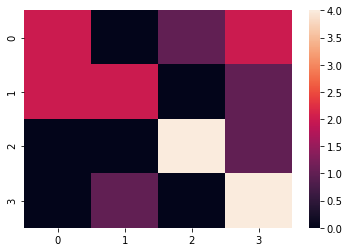

In [130]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [131]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.67      0.40      0.50         5
           2       0.80      0.80      0.80         5
           3       0.50      0.80      0.62         5

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.59        20
weighted avg       0.62      0.60      0.59        20



In [132]:
lbl_enc.classes_

array(['0 - Regime Normal/', '1 - Falta de tensão/', '2 - Sobrecarga/',
       '3 - Desbalanceamento do eixo/'], dtype=object)

# Notas:
* O algoritmo tem dificuldade para diferenciar "0" e "1"
* Será que um ganho no sinal ajudaria?

# 5º Teste: Aplicando um ganho na parte imaginaria com as técnicas do 3º teste

In [74]:
ganho = 0.5

def ganho_audio(row):
    row[4] = row[4] * ganho
    return row

In [75]:
X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_ganho = X_transform.apply(ganho_audio, axis=1, result_type='expand')
X_ganho.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_ganho.head()

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,305.159180,-3476.0,3145.0,8216.385376,-1.009673e-13
1,19.894043,-3654.0,4321.0,8145.628366,-1.096484e-13
2,296.060547,-3701.0,4180.0,9802.488175,0.000000e+00
3,617.674805,-3547.0,4654.0,10037.539304,3.923010e-13
4,313.874023,-3681.0,4748.0,9933.713270,4.443333e-13


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ganho, y, test_size=0.2, random_state=42, stratify=y)

In [77]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.550


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.350


NuSVC(gamma='auto', probability=True)
model score: 0.350


DecisionTreeClassifier()
model score: 0.600


RandomForestClassifier()
model score: 0.650


AdaBoostClassifier()
model score: 0.450


GradientBoostingClassifier()
model score: 0.500




In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [79]:
confusion_matrix(y_test, predicoes)

array([[2, 1, 1, 1],
       [2, 3, 0, 0],
       [0, 1, 3, 1],
       [0, 1, 0, 4]], dtype=int64)

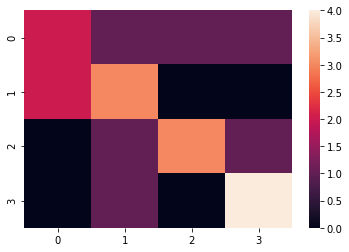

In [80]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [81]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.50      0.60      0.55         5
           2       0.75      0.60      0.67         5
           3       0.67      0.80      0.73         5

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



# 6º Teste: Aplicando faixas de frequencia ao conjunto de dados

Sera verificado se o conjunto de dados possui um valor minimo em alguns agrupamentos de frequencias nas seguintes faixas:

* 0-250
* 250-500
* 500-750
* 750-1000
* 1000-1250
* maiores que 1250

In [82]:
X_fft = np.fft.fft(X)
n = len(X)
X_fft = 2.0/n * np.abs(X_fft[:n//2])
arr_dataset_mean = X_fft.mean(axis=0)

ranges = (
        (0, 100),
        (250, 750),
        (750, 1250),
        (1250, 2000),
)


def mean_amplitude_by_freq_range(arr, high, low, sample_rate = 22050):
    n = len(data)
    T = 1/sample_rate

    amplitude = np.fft.fft(arr) # Aplica a FFT no audio
    amplitude = 2.0/n * np.abs(amplitude[:n//2]) # Módulo da amplitude
    frequency = np.linspace(0.0, 1.0/(2.0*T), n//2) # Cria um array contendo as frequencias
    min_index = np.argmax(frequency >= low)
    max_index = np.argmax(frequency >= high)

    return amplitude[min_index:max_index].mean()
    
    
def get_ranges(row, ranges):    
    arr_out = []   
    
    for low, high in ranges:      
        dataset_mean = mean_amplitude_by_freq_range(arr_dataset_mean, high, low)
        register_mean = mean_amplitude_by_freq_range(row, high, low)
        
        # Se o valor do registro for maior que a média considerar a faixa como verdadeira
        if register_mean >= 1.5 * dataset_mean:
            arr_out.append(1)
        else:
            arr_out.append(0)
    
    return arr_out


X_extract = pd.DataFrame([get_ranges(r, ranges) for r in X.values])
X_extract.columns = [str(l) + "-" + str(h) for l, h in ranges]

In [83]:
X_extract

,0-100,250-750,750-1250,1250-2000
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
91,0,0,0,0
92,0,0,1,1
93,1,0,1,0
94,1,0,1,0


### Baixa variacao, aumentar o numero de faixas

In [84]:
X_fft = np.fft.fft(X)
X_fft = 2.0/n * np.abs(X_fft[:n//2])
arr_dataset_mean = X_fft.mean(axis=0)

ranges = (
        (0, 100),
        (100, 200),
        (200, 300),
        (300, 400),
        (400, 500),
        (500, 600),
        (600, 700),
        (700, 800),
        (800, 900),
        (900, 1000),
        (1000, 1100),
        (1100, 1200),
        (1200, 2000),
)


def mean_amplitude_by_freq_range(arr, high, low, sample_rate = 22050):
    n = len(data)
    T = 1/sample_rate

    amplitude = np.fft.fft(arr) # Aplica a FFT no audio
    amplitude = 2.0/n * np.abs(amplitude[:n//2]) # Módulo da amplitude
    frequency = np.linspace(0.0, 1.0/(2.0*T), n//2) # Cria um array contendo as frequencias
    min_index = np.argmax(frequency >= low)
    max_index = np.argmax(frequency >= high)

    return amplitude[min_index:max_index].mean()
    
    
def get_ranges(row, ranges):    
    arr_out = []   
    
    for low, high in ranges:      
        dataset_mean = mean_amplitude_by_freq_range(arr_dataset_mean, high, low)
        register_mean = mean_amplitude_by_freq_range(row, high, low)
        
        # Se o valor do registro for maior que a média considerar a faixa como verdadeira
        if register_mean >= 1.5 * dataset_mean:
            arr_out.append(1)
        else:
            arr_out.append(0)
    
    return arr_out


X_extract = pd.DataFrame([get_ranges(r, ranges) for r in X.values])
X_extract.columns = [str(l) + "-" + str(h) for l, h in ranges]

In [85]:
X_extract

,0-100,100-200,200-300,300-400,400-500,500-600,600-700,700-800,800-900,900-1000,1000-1100,1100-1200,1200-2000
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,1,1,1,1,1,1
93,1,0,0,0,0,0,0,1,1,1,1,0,0
94,1,0,0,0,0,0,0,1,1,1,1,1,0


In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_extract, y, test_size=0.2, random_state=42, stratify=y)

In [87]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.150


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.250


NuSVC(gamma='auto', probability=True)
model score: 0.150


DecisionTreeClassifier()
model score: 0.250


RandomForestClassifier()
model score: 0.300


AdaBoostClassifier()
model score: 0.150


GradientBoostingClassifier()
model score: 0.300




In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [89]:
confusion_matrix(y_test, predicoes)

array([[3, 2, 0, 0],
       [2, 2, 1, 0],
       [2, 3, 0, 0],
       [0, 3, 1, 1]], dtype=int64)

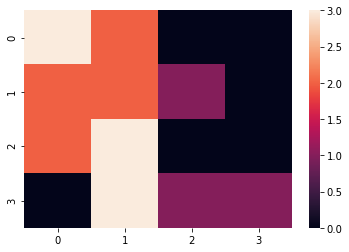

In [90]:
sns.heatmap(confusion_matrix(y_test, predicoes));

In [91]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.20      0.40      0.27         5
           2       0.00      0.00      0.00         5
           3       1.00      0.20      0.33         5

    accuracy                           0.30        20
   macro avg       0.41      0.30      0.28        20
weighted avg       0.41      0.30      0.28        20



# Conclusões:

* Algoritmo ainda nao consegue diferenciar desbalanceamento de eixo
* Melhor metodo ate o momento: Método 3.

## Utilização da busca em grade para obter os melhores parâmetros da árvore de decisão

In [92]:
X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform.head()

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,305.159180,-3476.0,3145.0,8216.385376,-2.019346e-13
1,19.894043,-3654.0,4321.0,8145.628366,-2.192969e-13
2,296.060547,-3701.0,4180.0,9802.488175,0.000000e+00
3,617.674805,-3547.0,4654.0,10037.539304,7.846020e-13
4,313.874023,-3681.0,4748.0,9933.713270,8.886666e-13


In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42, stratify=y)

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


criterion = ['gini', 'entropy']
max_depth = [2, 3, 4, 6, 8, 10, 12]
min_samples_split = [2, 3, 4, 6, 8, 10, 12]
    
parameters = {                
                'criterion':criterion, 
                'max_depth':max_depth, 
                'min_samples_split':min_samples_split
             }

dec_tree = DecisionTreeClassifier()
clf = GridSearchCV(dec_tree, parameters, scoring='f1_macro')

In [118]:
grid_search = clf.fit(X_train, y_train)

In [119]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 4}

In [120]:
best_clf = grid_search.best_estimator_

In [121]:
predicoes = best_clf.predict(X_test)
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.67      0.80      0.73         5
           2       0.33      0.40      0.36         5
           3       1.00      0.40      0.57         5

    accuracy                           0.55        20
   macro avg       0.62      0.55      0.55        20
weighted avg       0.62      0.55      0.55        20



In [122]:
confusion_matrix(y_test, predicoes)

array([[3, 0, 2, 0],
       [0, 4, 1, 0],
       [1, 2, 2, 0],
       [2, 0, 1, 2]], dtype=int64)

In [123]:
lbl_enc.classes_

array(['0 - Regime Normal/', '1 - Falta de tensão/', '2 - Sobrecarga/',
       '3 - Desbalanceamento do eixo/'], dtype=object)

**Agora o algoritmo esta confundindo a Sobrecarga com o Regime normal**

# Concluoes:

* Método: Obter os valores de média, minimo e máximo e a média da parte real e imaginária da FFT
* Classificador DecisionTreeClassifier com {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3}

# Resumo de exportação (modelo criado + funções de tratamento de dados)

#### Funções utilizadas

In [100]:
import numpy as np

def transform_array(arr):
    """ Esta função retorna os valores médios, minimos, 
    máximos e a média das componentes real e imaginária da FFT"""
    
    mean = arr.mean()
    minimun = arr.min()
    maximun = arr.max()
    
    fft_value = np.fft.fft(arr)
    real_part = np.abs(fft_value).mean()
    imaginary_part = np.imag(fft_value).mean()
    
    return np.array([mean, minimun, maximun, real_part, imaginary_part])

#### Treino do modelo

In [101]:
X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform.head()

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,305.159180,-3476.0,3145.0,11332.257144,-2.273737e-13
1,19.894043,-3654.0,4321.0,12496.597213,0.000000e+00
2,296.060547,-3701.0,4180.0,12886.051282,0.000000e+00
3,617.674805,-3547.0,4654.0,11888.214177,2.273737e-13
4,313.874023,-3681.0,4748.0,13832.573825,0.000000e+00


In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

criterion = ['gini', 'entropy']
max_depth = [2, 3, 4, 6, 8, 10, 12]
min_samples_split = [2, 3, 4, 6, 8, 10, 12]

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42, stratify=y)
    
parameters = {                
                'criterion':criterion, 
                'max_depth':max_depth, 
                'min_samples_split':min_samples_split
             }

dec_tree = DecisionTreeClassifier()
clf = GridSearchCV(dec_tree, parameters, scoring='f1_macro')
grid_search = clf.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

#### Exportação do modelo criado

In [103]:
import pickle as pkl


with open('Preditores/classificador.pkl', 'wb') as best_file:
    pkl.dump(best_clf, best_file)